In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train = pd.read_csv('/kaggle/input/d/broaniki/titanic/kaggle-titanic-master/input/train.csv')
test = pd.read_csv('/kaggle/input/d/broaniki/titanic/kaggle-titanic-master/input/test.csv')
gender_s = pd.read_csv('/kaggle/input/d/broaniki/titanic/kaggle-titanic-master/input/gender_submission.csv')

In [3]:
data = pd.concat([train,test])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA - Exploratory Data Analysis

### About the columns

 + PassengerId : Passenger number 
 + Survived : 0 = Dead 1 = Alive 
 + Pclass : 1 = First class 2 = Second class 3 = Third class 
 + Name : Name of passenger 
 + Sex : Gender 
 + Age : Age of passenger 
 + SibSp : Number of Siblings/Spouses Aboard. parch. Number of Parents/Children Aboard 
 + Parch : Number of Parents/Children Aboard. ticket. Ticket Number
 + Ticket : Ticket number 
 + Fare :  Passenger fare 
 + Cabin : Cabin number 
 + Embarked : Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown. More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown.

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data type of columns
- PassengerId - categorical(nominal) 
- Survived - categorical(nominal) 
- Pclass - categorical(ordinal) 
- Sex - categorical(nominal) 
- Age - numeric(continuous)
- SibSp - numeric(continuous)
- Parch - numeric(continuous)
- Ticket - categorical(nominal) 
- Fare - numeric(discrete)
- Cabin - categorical(ordinal)
- Embarked - categorical(ordinal)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
# None values on percentage
missing_data = pd.DataFrame({'total_missing':data.isna().sum(),'perc_missing' : data.isna().sum()/data.shape[0]})
missing_data

,total_missing,perc_missing
PassengerId,0,0.000000
Survived,418,0.319328
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,263,0.200917
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.000764


In [8]:
# Statistical description of numerical variables
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## Data Cleaning

In [9]:
data = data.dropna(subset = ['Fare','Embarked']).reset_index(drop=True)

## Handling missing values & Feature Engineering

In [10]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Age'] = data['Age'].astype('int')

In [11]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24',

In [12]:
data['deck'] = [None]*data.shape[0]

decks = data[data['Cabin'].notnull()]['Cabin'].str[0]

data.loc.__setitem__((data['Cabin'].notnull().index, ('deck')), decks)

In [13]:
data.groupby('deck')['Fare'].agg('max').sort_values()

deck
G     16.7000
T     35.5000
F     39.0000
A     81.8583
D    113.2750
E    134.5000
C    263.0000
B    512.3292
Name: Fare, dtype: float64

In [14]:
deck_categories = ['G', 'T', 'F', 'A', 'D', 'E', 'C', 'B']


conditions = [(data[data['deck'] == 'G']['Fare'].max() >= data['Fare']),
              (data[data['deck'] == 'G']['Fare'].max() < data['Fare']) & (data[data['deck'] == 'T']['Fare'].max() >= data['Fare']),
              (data[data['deck'] == 'T']['Fare'].max() < data['Fare']) & (data[data['deck'] == 'F']['Fare'].max() >= data['Fare']),
              (data[data['deck'] == 'F']['Fare'].max() < data['Fare']) & (data[data['deck'] == 'A']['Fare'].max() >= data['Fare']),
              (data[data['deck'] == 'A']['Fare'].max() < data['Fare']) & (data[data['deck'] == 'D']['Fare'].max() >= data['Fare']),
              (data[data['deck'] == 'D']['Fare'].max() < data['Fare']) & (data[data['deck'] == 'E']['Fare'].max() >= data['Fare']),
              (data[data['deck'] == 'E']['Fare'].max() < data['Fare']) & (data[data['deck'] == 'C']['Fare'].max() >= data['Fare']),
              (data[data['deck'] == 'C']['Fare'].max() < data['Fare'])]

data['deck'] = np.select(conditions,
                        deck_categories)

In [15]:
data.isna().sum()

PassengerId       0
Survived        417
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1013
Embarked          0
deck              0
dtype: int64

# Data Visualization

### What is the percentage of Survived?

In [16]:
for_vis = data.copy()
for_vis['Survived'] = for_vis['Survived'].fillna('Unknown')

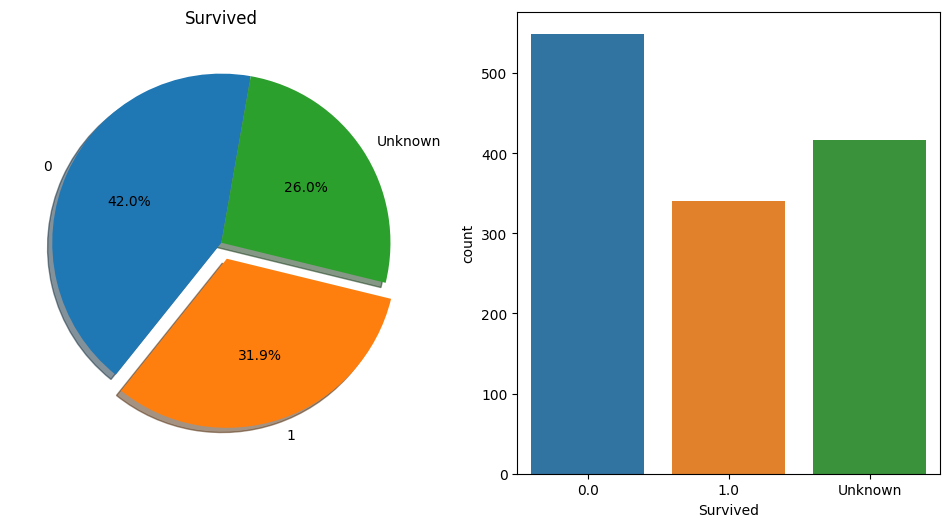

In [17]:
f,ax=plt.subplots(1,2,figsize=(12,6))
explode = (0, 0.1, 0)  

ax[0].pie(for_vis['Survived'].value_counts(),labels=[0,1,'Unknown'], explode=explode, autopct='%1.1f%%',
       shadow=True, startangle=80)

ax[0].set_title('Survived')

sns.countplot(for_vis, x = 'Survived',ax=ax[1])

plt.show()

### Comparing the number of Survived people by gender to the total number of people

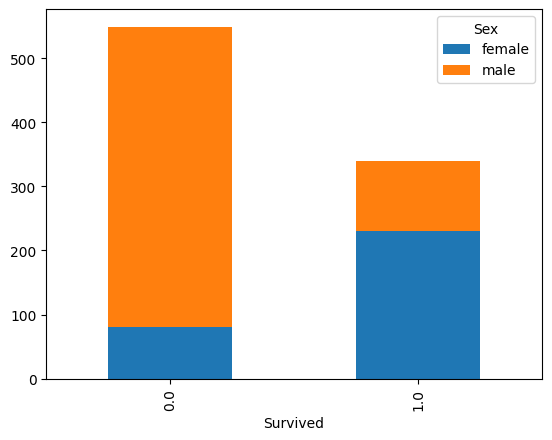

In [18]:
df_plot = data.groupby(['Sex', 'Survived']).size().reset_index().pivot(columns='Sex', index='Survived', values=0)

df_plot.plot(kind='bar',stacked=True)
plt.show()

### Does the fare depend on death?

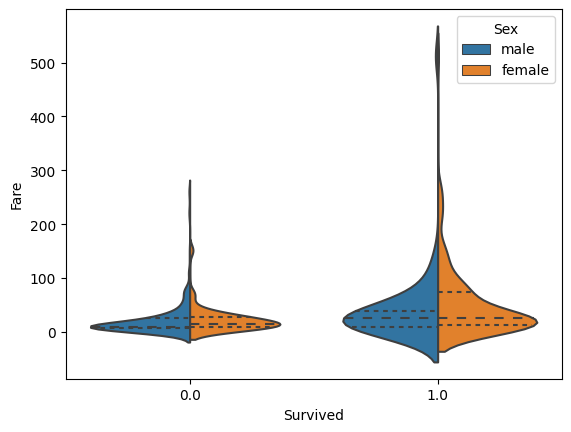

In [19]:
sns.violinplot(data=data, x="Survived", y="Fare", hue="Sex", split=True, inner="quart")
plt.show()

In [20]:
# count for survived amount by sex and fare
data[(200<=data['Fare'])&(300>data['Fare'])].groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1.0         11
male    0.0          6
Name: count, dtype: int64

In [21]:
sur_1 = np.array([301,25,11,3])
sur_0 = np.array([535,8,6,0])
total = np.array([836,33,17,3])
df = pd.DataFrame({'fare_interval' : ['<100','100-200','200-300','300<'],
                  'death_amount' : sur_1,
                  'survivor_amount' : sur_0,
                   'total' : total,
                  'death_pct' : 100*np.round(sur_1/total,3),
                  'survivor_pct' : 100*np.round(sur_0/total,3)}
)
df = df.set_index('fare_interval')
df

,death_amount,survivor_amount,total,death_pct,survivor_pct
fare_interval,,,,,
<100,301,535,836,36.0,64.0
100-200,25,8,33,75.8,24.2
200-300,11,6,17,64.7,35.3
300<,3,0,3,100.0,0.0


### Survived or not by age and sex

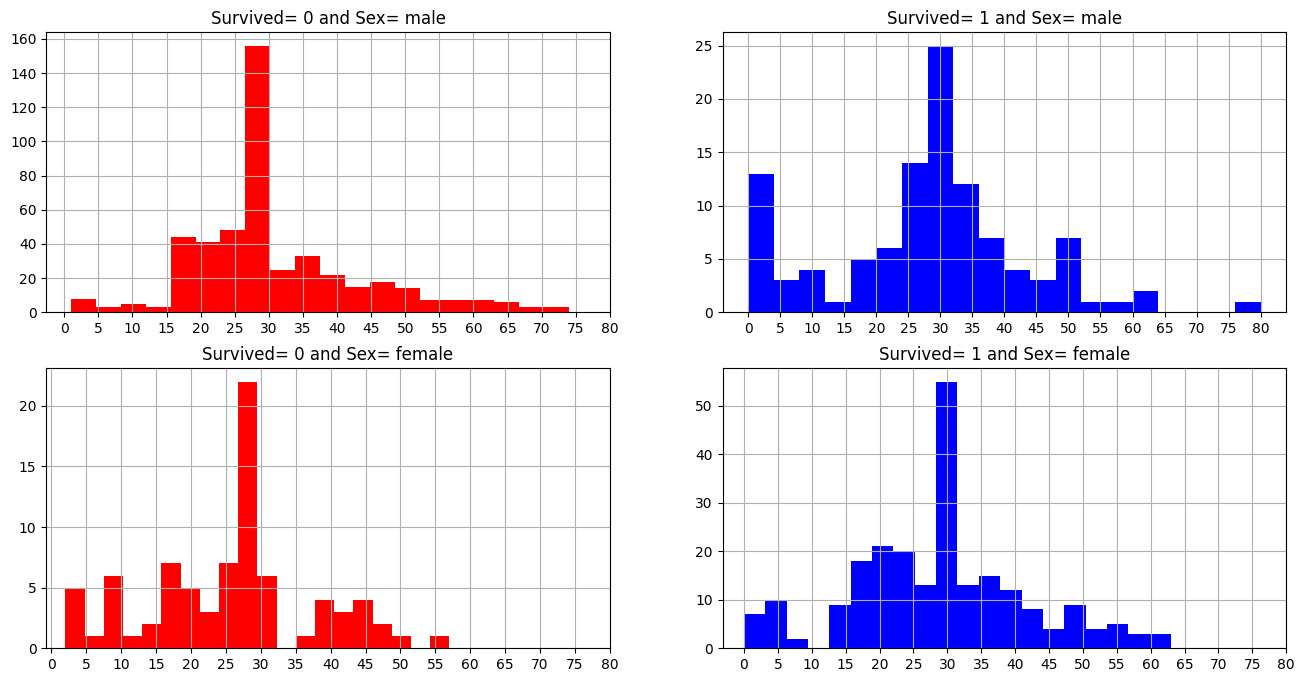

In [22]:
f,ax=plt.subplots(2,2,figsize=(16,8))

data[(data['Survived']==0)&(data['Sex'] == 'male')]['Age'].hist(ax=ax[0][0],bins=20,color='red')
ax[0][0].set_title('Survived= 0 and Sex= male')
x1=list(range(0,85,5))
ax[0][0].set_xticks(x1)

data[(data['Survived']==1)&(data['Sex'] == 'male')]['Age'].hist(ax=ax[0][1],color='blue',bins=20)
ax[0][1].set_title('Survived= 1 and Sex= male')
ax[0][1].set_xticks(x1)

data[(data['Survived']==0)&(data['Sex'] == 'female')]['Age'].hist(ax=ax[1][0],bins=20,color='red')
ax[1][0].set_title('Survived= 0 and Sex= female')
ax[1][0].set_xticks(x1)

data[(data['Survived']==1)&(data['Sex'] == 'female')]['Age'].hist(ax=ax[1][1],color='blue',bins=20)
ax[1][1].set_title('Survived= 1 and Sex= female')
ax[1][1].set_xticks(x1)

plt.show()

### Survived vs Pclass/deck/Embarked

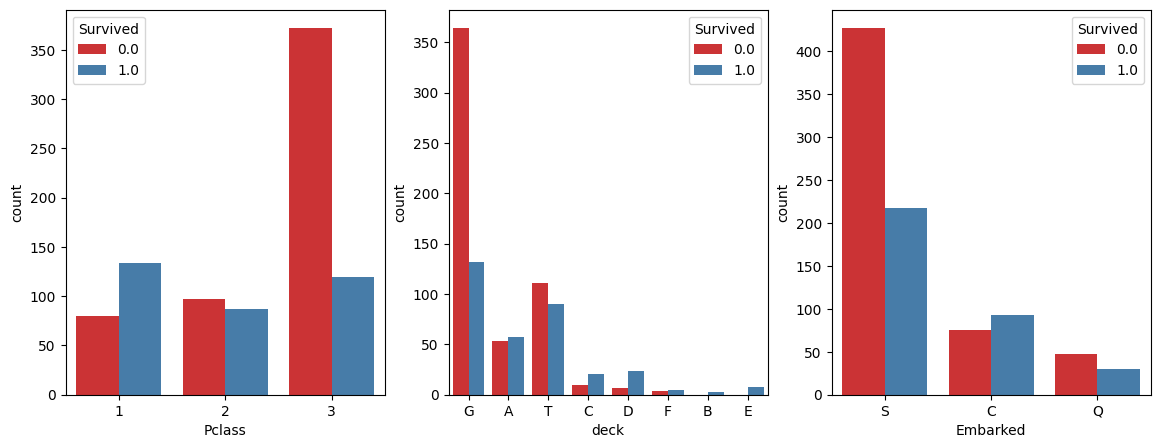

In [23]:
f,ax = plt.subplots(1,3,figsize=(14,5))
sns.countplot(x='Pclass',data=data,hue='Survived',ax=ax[0],palette='Set1')
sns.countplot(x='deck',data=data,hue='Survived',ax=ax[1],palette='Set1')
sns.countplot(x='Embarked',data=data,hue='Survived',ax=ax[2],palette='Set1')
plt.show()

### Fare by Pclass,deck and Embarked

In [24]:
data.groupby('Pclass')['Fare'].agg(['mean']).sort_values(by='mean',ascending=False)

,mean
Pclass,
1,87.555777
2,21.179196
3,13.302889


In [25]:
data.groupby('deck')['Fare'].agg(['mean']).sort_values(by='mean',ascending=False)

,mean
deck,
B,512.329200
C,203.028348
E,129.072727
D,94.340849
A,60.018161
F,37.967507
T,26.114334
G,9.470114


In [26]:
data.groupby('Embarked')['Fare'].agg(['mean']).sort_values(by='mean',ascending=False)

,mean
Embarked,
C,62.336267
S,27.418824
Q,12.409012


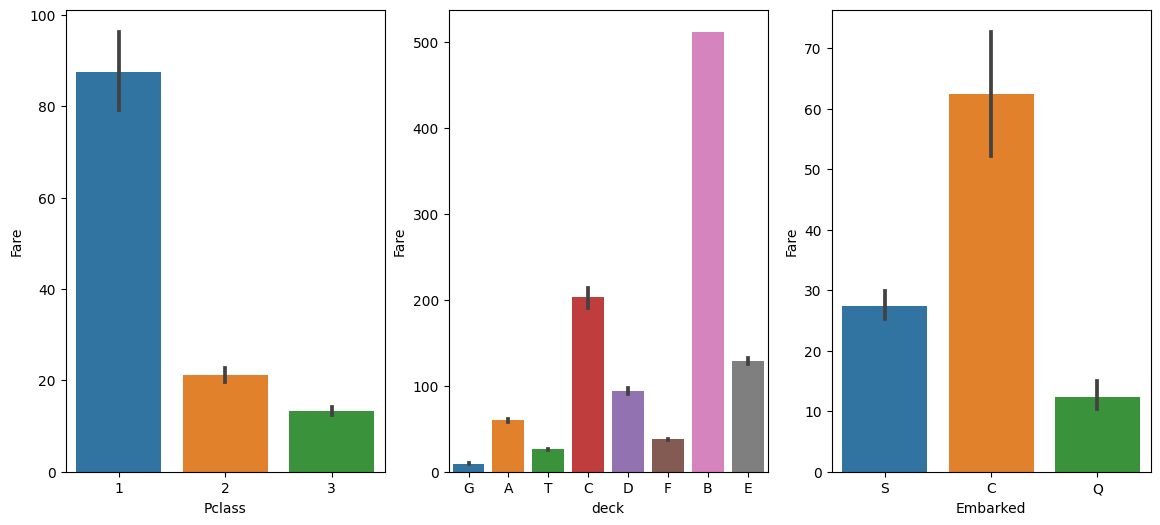

In [27]:
f,ax = plt.subplots(1,3,figsize=(14,6))
sns.barplot(x='Pclass',y='Fare',data=data,ax=ax[0])
sns.barplot(x='deck',y='Fare',data=data,ax=ax[1])
sns.barplot(x='Embarked',y='Fare',data=data,ax=ax[2])
plt.show()

## Conclusion
In the collision between the Titanic and the iceberg, 42% of the total passengers died, 32% survived, and it is unknown what happened to 26%. The number of dead women is significantly higher compared to men. <br>
**Can money help when death comes 🤔 ?!** <br>
Based on data from the dataset, passengers who paid more fares survived longer than those who paid less. <br>
**But!!!** <br>
The people who boarded the ship with low fares were mostly ordinary people. It is obvious that those who boarded the ship with high fares were rich people. During the rescue, attention was paid to the class of people. may be. <br>
Analyzing by age, the majority of passengers were men and women between the ages of 25-30. Therefore, death and survival were mostly observed in this age range. 
If we look at classes, people in class 3 died more. <br>
The death toll by city is almost twice as many as the number of survivors in Southampton.